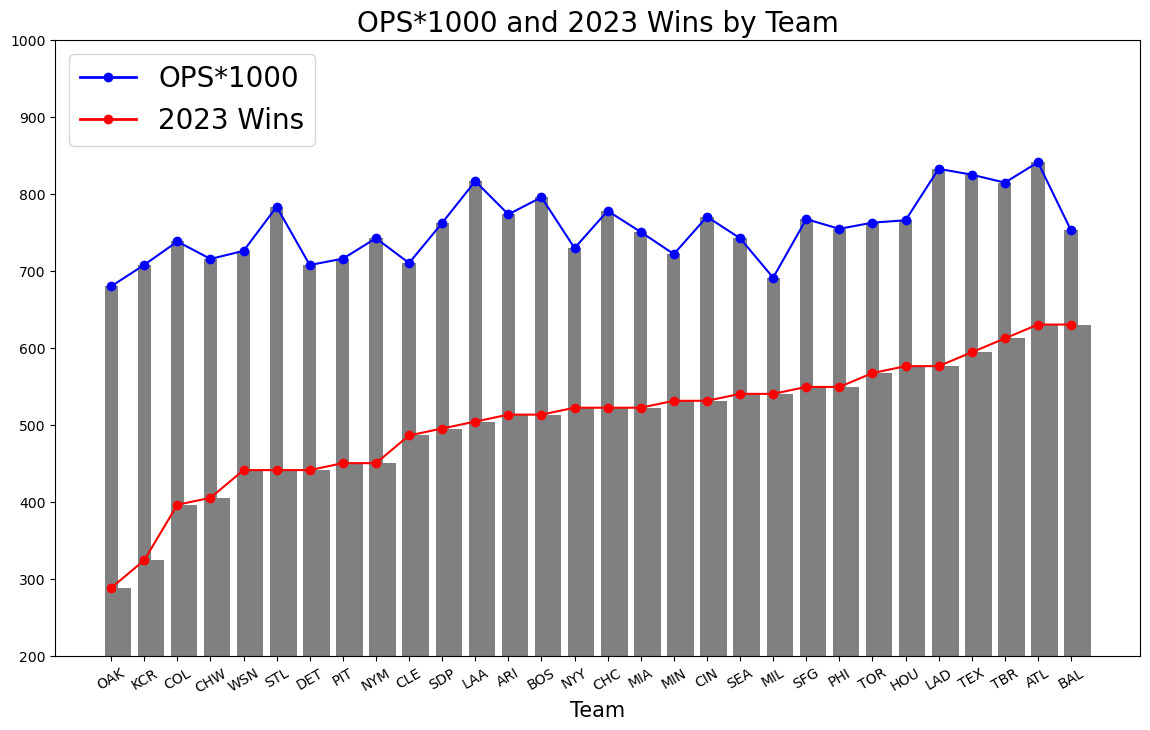

In [14]:
#     In 2018, MLB.com surveyed baseball players about their preferred statistic for evaluating a 
# player's ability. The top choices were 'OPS' (On-Base plus Slugging), 'RBI' (Runs Batted In), and 
# 'R' (Runs Scored).
#
#     This code analyzes these stats with three bar graphs, displaying each team's regular-season wins 
# (ascending) alongside a top-9 player average of one of these stats. The graphs also include two 
# line graphs illustrating all teams' regular-season wins and their respective chosen stat.
# 
#     The datasets used contain MLB player stats (VIVO VINCO on Kaggle) and win-loss record of each
# MLB team, both up to early August of 2023. 


#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D 

#load datasets
bat_file_path = '2023 MLB Player Stats - Batting.csv'
bat_ds = pd.read_csv(bat_file_path, delimiter=';', encoding = 'latin1')
team_file_path = 'Baseball Team 23 Records.xlsx'
team_ds = pd.read_excel(team_file_path)

#rename bat_ds column to match foreign key for team_ds
bat_ds.rename(columns={'Tm': 'Team ID'}, inplace=True)

#inner-merge the datasets on foreign key 'Team ID'
full_ds = bat_ds.merge(team_ds, on='Team ID', how='inner')

#make a new column for OPS, RBI and R multiplied to rank top 9 overall batters for each team
full_ds['Stats_Score'] = full_ds['OPS'] * full_ds['RBI'] * full_ds['R']

#filter dataset to only include top 9 batters calculated by OPS * RBI * R
best_hitters_ds = pd.concat([group.nlargest(9, 'Stats_Score') for _, group in full_ds.groupby('Team Name')])

#organize list from teams with least wins to most wins and reset index
best_hitters_ds = best_hitters_ds.sort_values(by='2023 Wins')
best_hitters_ds.reset_index(drop=True, inplace=True)

#prep for graphing
team_order = best_hitters_ds['Team ID'].unique()
x_labels = best_hitters_ds['Team ID'].unique()
total_ops = []
total_rbi = []
total_r = []
total_wins = []
x_counter = 0

plt.figure(figsize=(14, 8))

# loop through each team and plot bars in a bar graph for OPS and 2023 Wins
for i, team in enumerate(team_order):
    team_data = best_hitters_ds[best_hitters_ds['Team ID'] == team]
    # multiply each team's average ops by 1000 for a better fit on the y-axis
    ops = team_data['OPS'].mean() * 1000
    wins_2023 = team_data['2023 Wins'].values

    plt.bar(x_counter, ops, width=0.4, label=f'{team} AVG OPS*1000', align='center', color='grey')
    plt.bar(x_counter + 0.4, np.sum(wins_2023), width=0.4, label=f'{team} 2023 Wins', align='center', color='grey')
    
    total_ops.append(ops)  
    total_wins.append(np.sum(wins_2023))
    
    x_counter += 1

# define and set graph labels
plt.ylim(200, 1000)
plt.xticks(range(len(x_labels)), x_labels, rotation=30)    
plt.xlabel('Team', fontsize='15')
plt.title('OPS*1000 and 2023 Wins by Team', fontsize='20')

# Plot line graphs
plt.plot(range(len(x_labels)), total_ops, marker='o', label='OPS', linestyle='-', color='b')
plt.plot(range(len(x_labels)), total_wins, marker='o', label='Total 2023 Wins', linestyle='-', color='r')

# Create a legend for the blue and red line graphs
legend_handles = [
    Line2D([0], [0], color='b', lw=2, marker='o', label='OPS*1000'),
    Line2D([0], [0], color='r', lw=2, marker='o', label='2023 Wins')
]
plt.legend(handles=legend_handles, loc='upper left', fontsize='20')

plt.show()

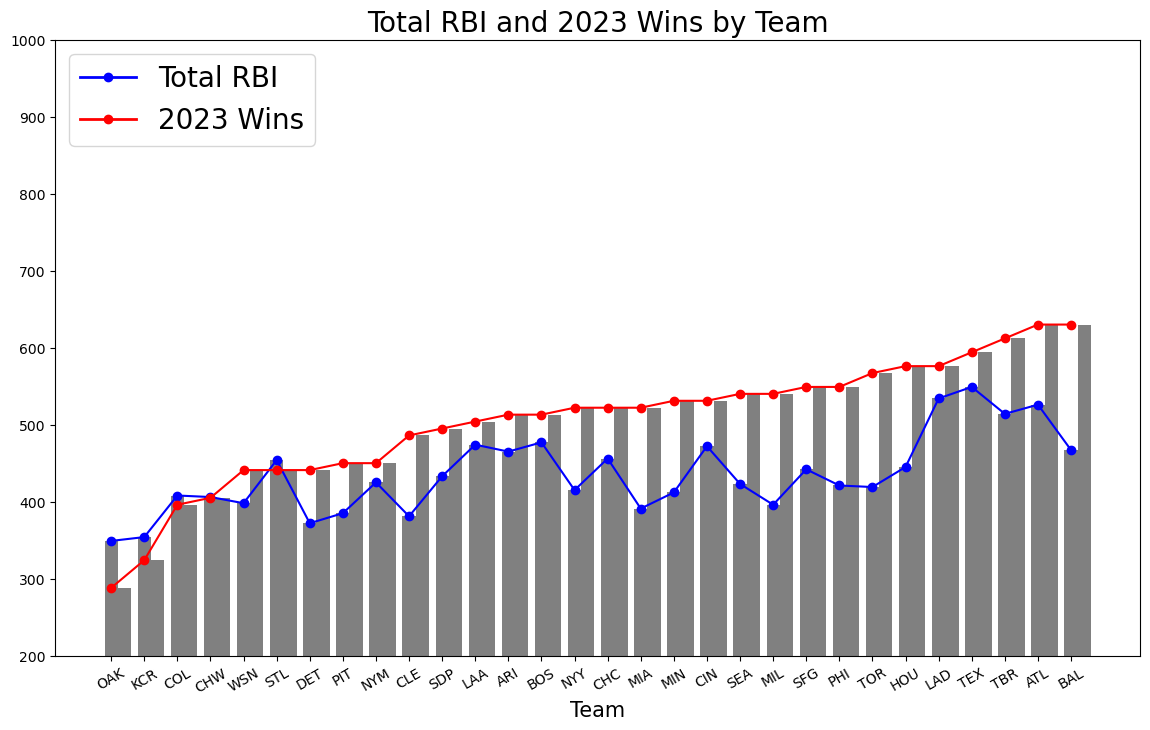

In [15]:
# Calculate the sum of RBI for each team in the full_ds dataset
team_rbi_sum = full_ds.groupby('Team ID')['RBI'].sum().reset_index()

# Sort the dataset by 2023 Wins
best_hitters_ds = pd.concat([group.nlargest(9, 'Stats_Score') for _, group in full_ds.groupby('Team Name')])
best_hitters_ds = best_hitters_ds.sort_values(by='2023 Wins')
best_hitters_ds.reset_index(drop=True, inplace=True)

# Prep for graphing
team_order = best_hitters_ds['Team ID'].unique()
x_labels = best_hitters_ds['Team ID'].unique()
total_rbi = []
total_wins = []
x_counter = 0

plt.figure(figsize=(14, 8))

# Loop through each team and plot bars in a bar graph for RBI and 2023 Wins
for i, team in enumerate(team_order):
    team_data = best_hitters_ds[best_hitters_ds['Team ID'] == team]
    rbi = team_rbi_sum[team_rbi_sum['Team ID'] == team]['RBI'].values[0]
    wins_2023 = team_data['2023 Wins'].values

    plt.bar(x_counter, rbi, width=0.4, label=f'{team} Total RBI', align='center', color='grey')
    plt.bar(x_counter + 0.4, np.sum(wins_2023), width=0.4, label=f'{team} 2023 Wins', align='center', color='grey')
    
    total_rbi.append(rbi)
    total_wins.append(np.sum(wins_2023))
    
    x_counter += 1

# Define and set graph labels
plt.ylim(200, 1000)  # Adjust the y-axis limits as needed
plt.xticks(range(len(x_labels)), x_labels, rotation=30)    
plt.xlabel('Team', fontsize='15')
plt.title('Total RBI and 2023 Wins by Team', fontsize='20')

# Plot line graphs
plt.plot(range(len(x_labels)), total_rbi, marker='o', label='Total RBI', linestyle='-', color='b')
plt.plot(range(len(x_labels)), total_wins, marker='o', label='Total 2023 Wins', linestyle='-', color='r')

# Create a legend for the blue and red line graphs
legend_handles = [
    Line2D([0], [0], color='b', lw=2, marker='o', label='Total RBI'),
    Line2D([0], [0], color='r', lw=2, marker='o', label='2023 Wins')
]
plt.legend(handles=legend_handles, loc='upper left', fontsize='20')

plt.show()


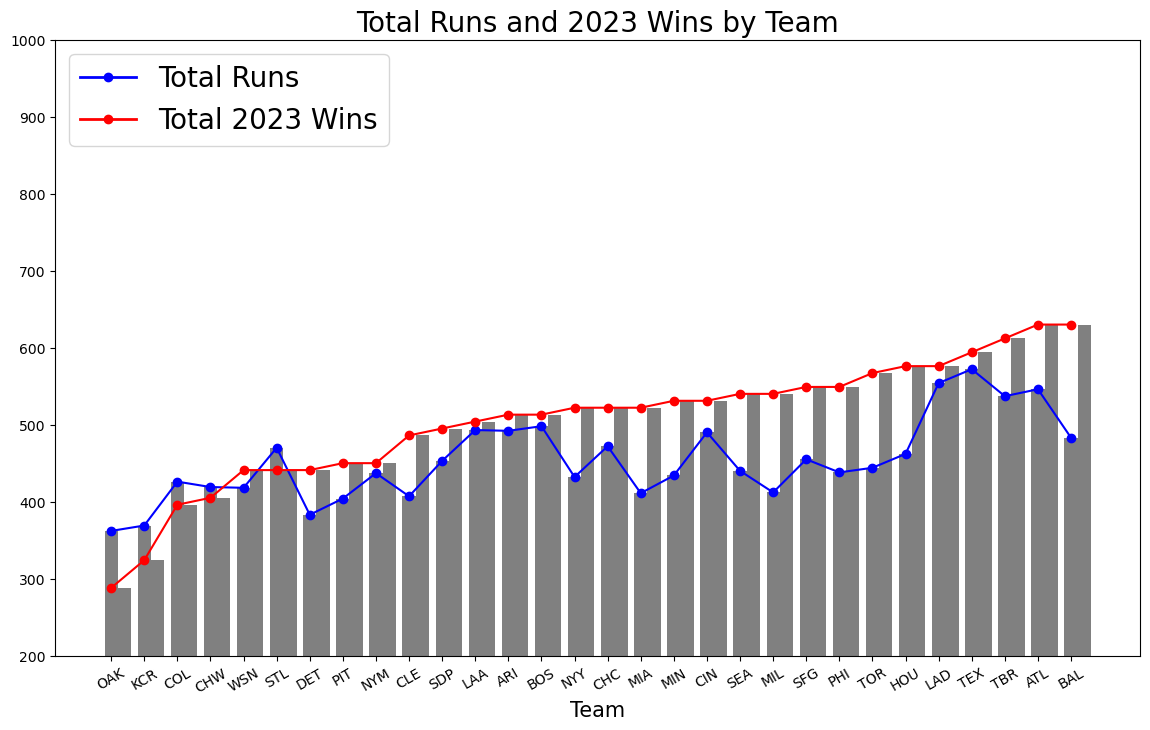

In [16]:
# Calculate the sum of 'R' (runs scored) for each team in the full_ds dataset
team_runs_sum = full_ds.groupby('Team ID')['R'].sum().reset_index()

# Sort the dataset by 2023 Wins
best_hitters_ds = pd.concat([group.nlargest(9, 'Stats_Score') for _, group in full_ds.groupby('Team Name')])
best_hitters_ds = best_hitters_ds.sort_values(by='2023 Wins')
best_hitters_ds.reset_index(drop=True, inplace=True)

# Prep for graphing
team_order = best_hitters_ds['Team ID'].unique()
x_labels = best_hitters_ds['Team ID'].unique()
total_runs = []
total_wins = []
x_counter = 0

plt.figure(figsize=(14, 8))

# Loop through each team and plot bars in a bar graph for 'R' and 2023 Wins
for i, team in enumerate(team_order):
    team_data = best_hitters_ds[best_hitters_ds['Team ID'] == team]
    runs = team_runs_sum[team_runs_sum['Team ID'] == team]['R'].values[0]
    wins_2023 = team_data['2023 Wins'].values

    plt.bar(x_counter, runs, width=0.4, label=f'{team} Total Runs', align='center', color='grey')
    plt.bar(x_counter + 0.4, np.sum(wins_2023), width=0.4, label=f'{team} 2023 Wins', align='center', color='grey')
    
    total_runs.append(runs)
    total_wins.append(np.sum(wins_2023))
    
    x_counter += 1

# Define and set graph labels
plt.ylim(200, 1000)  # Adjust the y-axis limits as requested
plt.xticks(range(len(x_labels)), x_labels, rotation=30)    
plt.xlabel('Team', fontsize='15')
plt.title('Total Runs and 2023 Wins by Team', fontsize='20')

# Plot line graph for Total Runs
plt.plot(range(len(x_labels)), total_runs, marker='o', label='Total Runs', linestyle='-', color='b')
# Plot line graph for 2023 Wins
plt.plot(range(len(x_labels)), total_wins, marker='o', label='Total 2023 Wins', linestyle='-', color='r')

# Create a legend for the grey bars (Total Runs) and red/blue line graphs (2023 Wins)
legend_handles = [
    Line2D([0], [0], color='b', lw=2, marker='o', label='Total Runs'),
    Line2D([0], [0], color='r', lw=2, marker='o', label='Total 2023 Wins')
]
plt.legend(handles=legend_handles, loc='upper left', fontsize='20')

plt.show()


In [ ]:
#     When analyzing the visualizations, three key conclusions emerge regarding the relationship 
# within the data:
#
#     1) A slight upward trend in the blue 'stat' line graph can be observed as the 'team wins' 
#    increase.
#     2) The overall shape of the blue line in all three graphs closely mirror each other, suggesting 
#    a high degree of similarity among these three statistics.
#     3) Notably, there seems to be no clear-cut 'winner' among these statistics in terms of their 
#    relevance to each team's win-loss records.